<a href="https://colab.research.google.com/github/MarioROT/CV-MAI/blob/main/Session%203/filters_and_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

In [2]:
%%shell
git clone https://github.com/mariorot/CV-MAI
mv CV-MAI/scripts/custom_plots.py /content/

Cloning into 'CV-MAI'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 140 (delta 67), reused 57 (delta 16), pack-reused 0
Receiving objects: 100% (140/140), 14.28 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
from skimage.util import img_as_ubyte as iau
from scipy import ndimage
import custom_plots as cp

# Convolution
Hint:
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [4]:
# solution
camera = data.camera()
mask_hor = np.ones((1,15)) /15
hor_conv = ndimage.convolve(camera, mask_hor)

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [5]:
# solution
mask_vert = np.ones((15,1))/15
vert_conv = ndimage.convolve(camera, mask_vert)

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

In [6]:
# solution
mask_sq = np.ones((15,15))/(15*15)
sq_conv = ndimage.convolve(camera, mask_sq)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

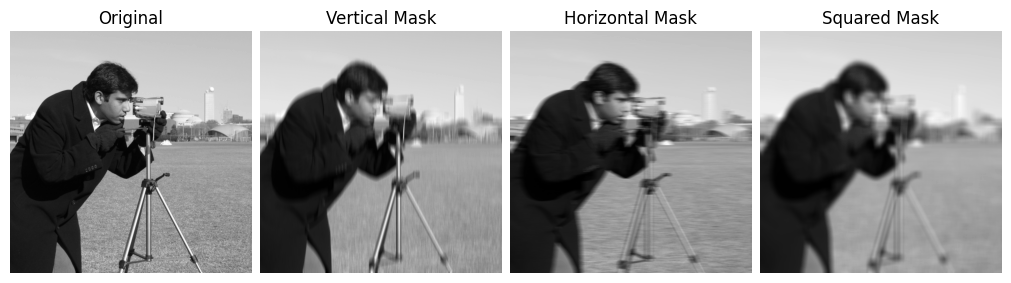

In [7]:
# solution
cp.custom_grids([camera, vert_conv, hor_conv, sq_conv], 1, 4, ['Original', 'Vertical Mask', 'Horizontal Mask', 'Squared Mask'], axis='off', cmap='gray').show()

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


0

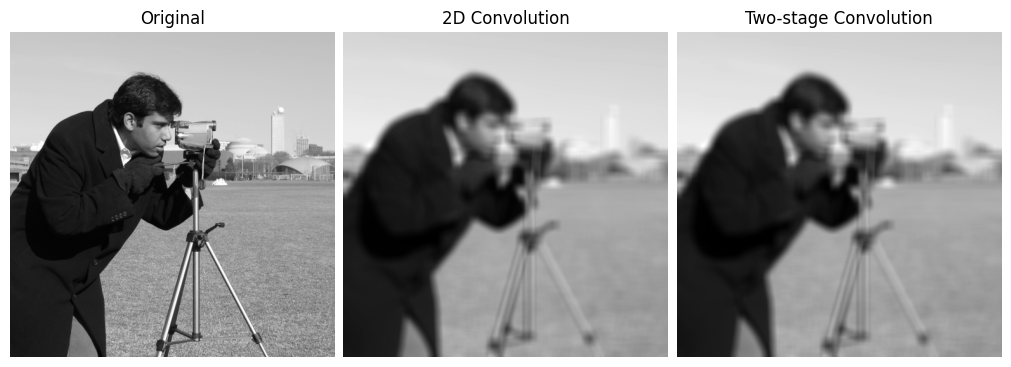

In [9]:
# solution
two_stage = ndimage.convolve(ndimage.convolve(camera, mask_vert), mask_hor)
cp.custom_grids([camera, sq_conv, two_stage], 1, 3, ['Original', '2D Convolution', 'Two-stage Convolution'], cmap='gray', axis='off').show()
(sq_conv-two_stage).min()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**
- Since all the values were set to 1, in this case the result is exactly the same. Applyng first the vertical mask, and then the horizontal (even viceversa) or applying the 2D mask.

- However, if we hadn't had all the values set to 1, the result would have been different.

...

# Image Blurring

*   Why is blurring important?



**Solution**
- Blurring is relevant because it allows us to **keep the general information** of the image while removing the details. One useful thing to do so, is the **edge detection**. We **keep the contours** and remove the details inside these.

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

In [10]:
# solution
astronaut = data.astronaut()
ast_gray = color.rgb2gray(astronaut)
ast_gauss_1 = filters.gaussian(ast_gray)

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

In [11]:
# solution
ast_gauss_0 = filters.gaussian(ast_gray, 0)

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

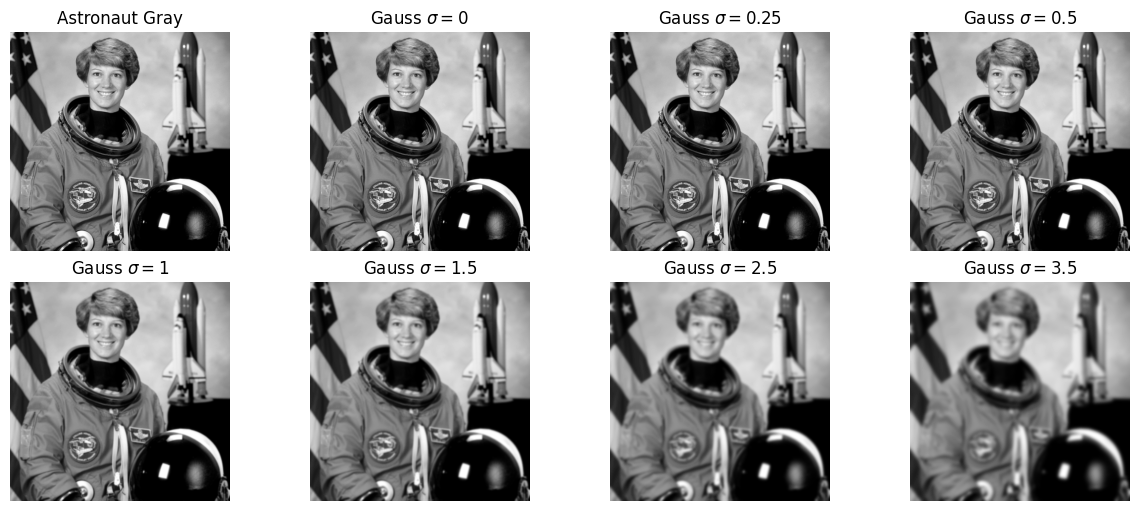

In [12]:
# solution
ast_gauss = [filters.gaussian(ast_gray, sigma) for sigma in [0,0.25,0.5,1,1.5,2.5,3.5]]
ag_titles = [f'Gauss $\sigma = {x}$' for x in [0,0.25,0.5,1,1.5,2.5,3.5]]

cp.custom_grids([ast_gray] + ast_gauss, 2, 4, ['Astronaut Gray'] + ag_titles, axis='off', cmap='gray', figsize = (12,5)).show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

- When using a larger sigma (standard deviation) we are considering a larger amount of pixels around the center to perform the smoothness, and therefore the amount of blur is higher.

- Depending on the specific task to perform, a higher or lower value for blurness will be needed and how much we want to eliminate the details inside the contours.

- Moreover, the ideal sigma value in edge detection applications would be decided by the scale of the edges to be identified since taking the derivative of the Gaussian kernel might be employed for edge detection. For instance, a higher sigma value would enable the detection of bigger size edges.

...

### Exercise: Median Filter
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

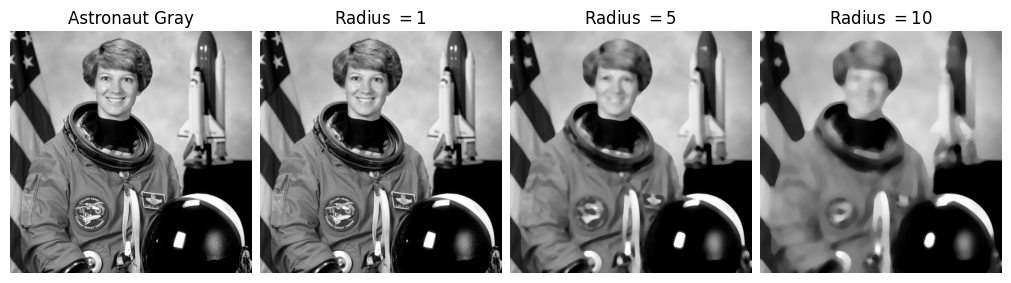

In [13]:
# solution
median_filters = [filters.median(ast_gray, morphology.disk(x)) for x in [1, 5, 10]]
median_titles = [f'Radius $={x}$' for x in [1,5,10]]

cp.custom_grids([ast_gray] + median_filters, 1, 4, ['Astronaut Gray'] + median_titles, axis='off', cmap='gray').show()

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

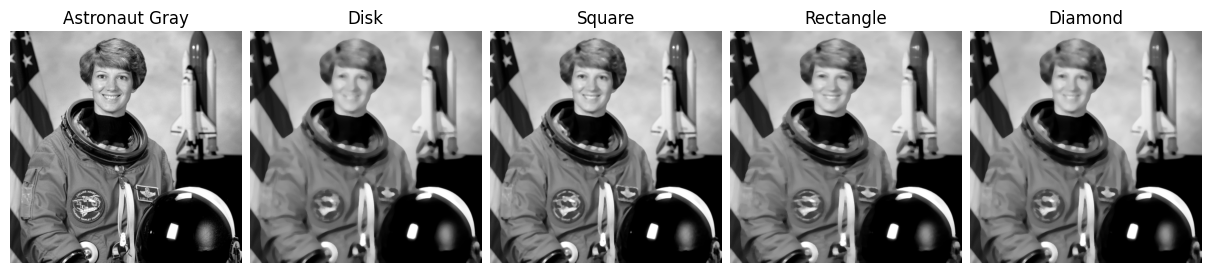

In [14]:
# solution
s_elements = [morphology.disk(5), morphology.square(5), morphology.rectangle(5,10), morphology.diamond(5)]
filtered_imgs = [filters.median(ast_gray, se) for se in s_elements]

cp.custom_grids([ast_gray] + filtered_imgs, 1, 5, ['Astronaut Gray', 'Disk', 'Square', 'Rectangle', 'Diamond'], axis='off', cmap='gray', figsize=(12,5)).show()

*   What is the effect of the structuring element on the median filter?


**Solution**

Depending on the filter and assuming we have a proportional size of the kernel. It gives more relevance to the pixels set to 1 within the structur, for example, in the diamond structure, the corners are not taken into account. Same case than the disk. Regardless of the shape chosen, increasing the size of the filter will increase the amount of blur.


*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**
- A box filter or mean filter, gives the same relevance to all the pixels.
- The mean filter may generate a pixel value that did not previously exist, whereas the median filter frequently provides a more realistic result.
- The median filter, helps us maintain the edges and reduce the high frequency noise. It is often more effective than the mean filter at reducing noise while maintaining image detail, since outliers won't affect the median value as much.
- The gaussian filter, take into account the normal distribution to give more relevance the pixels closer to the center.




- The mean filter could be use to reduce the noise, however depending on the noise, the mean or gaussian filters could work better.
- The median filter could be used effectively when having "salt-pepper" (since these are outliers) noise and trying to reduce it.
- The gaussian filter could be used as a previous stage to edge detection, by reducing noise and keeping the edges.

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

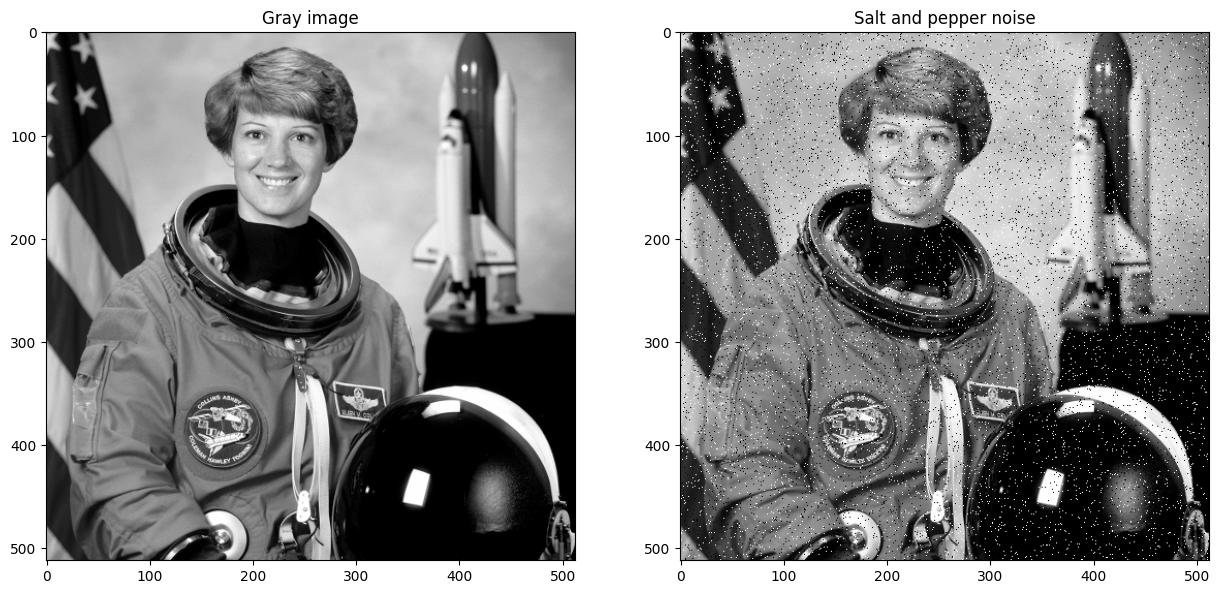

In [15]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

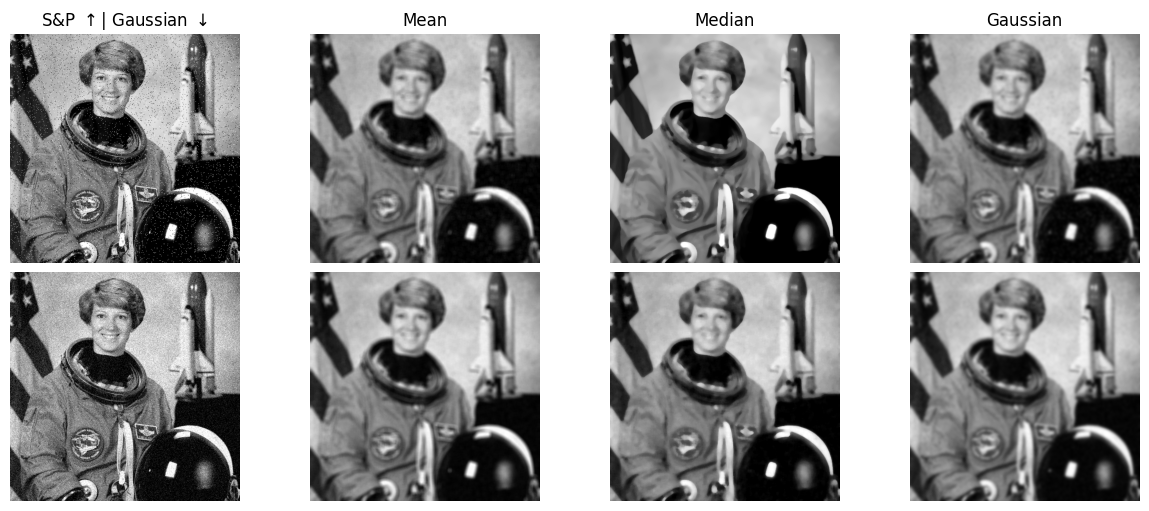

In [16]:
# solution
sp_noise = random_noise(ast_gray, mode='s&p')
gauss_noise = random_noise(ast_gray, mode='gaussian')

filter_imgs = lambda imgs, filters, params: [e for l in [[img] + [f(iau(img), *p) for f,p in zip(filters, params)] for img in imgs] for e in l]
filtered_imgs = filter_imgs([sp_noise, gauss_noise], [filters.rank.mean, filters.median, filters.gaussian], [[s_elements[0]], [s_elements[0]],[3]])
titles = ['S&P $\\uparrow$| Gaussian $\downarrow$', 'Mean', 'Median', 'Gaussian']

cp.custom_grids(filtered_imgs, 2, 4, titles + ['']*4, cmap='gray', axis='off', figsize=(12,5)).show()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**
As seen in the images above:
- The gaussian filter, works better with the gaussian noise. These is because both the noise and filter, follow a common gaussian distribution.

- The salt and pepper noise, is best filtered with the median filter, since the process of the median, doesnt take into consideration all the values, but they are sorted, the high and low values of the pixels are not taken into account and therefore eliminated.



# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

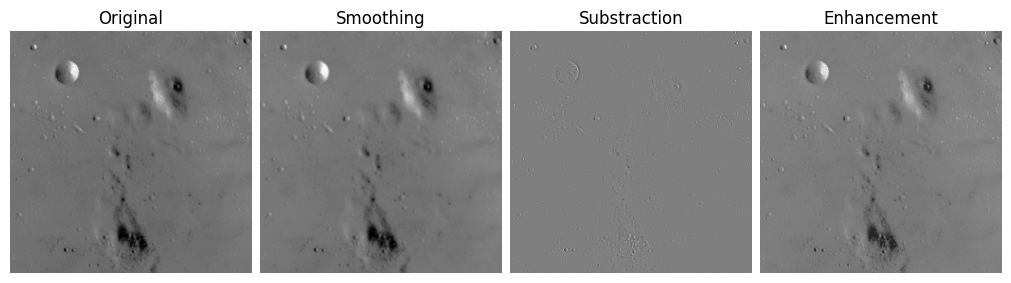

In [17]:
# solution
moon = data.moon()
moon_smth = filters.gaussian(moon, 1, preserve_range=True)
moon_subs = moon - moon_smth
moon_enh = moon + (1 * moon_subs)

cp.custom_grids([moon, moon_smth, moon_subs, moon_enh], 1, 4, ['Original', 'Smoothing', 'Substraction', 'Enhancement'], cmap='gray', axis='off').show()

*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

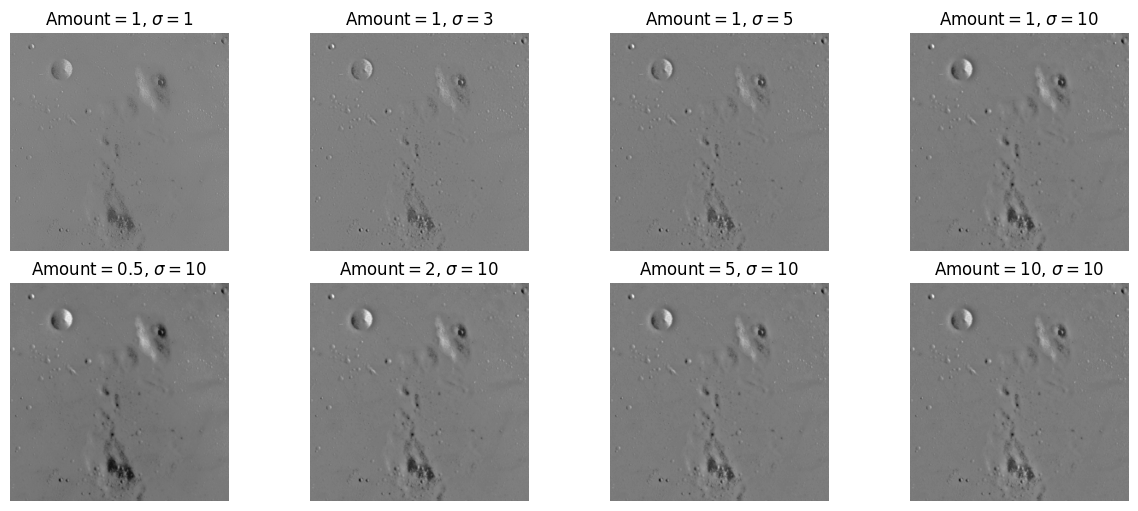

In [18]:
# solution

enhance_image = lambda img, sigma, amount: img + (amount * (img - filters.gaussian(img, sigma, preserve_range=True)))

gaus_imgs = [enhance_image(moon, sigma, 4) for sigma in [1,3,5,10]]
enh_images = [enhance_image(moon, 10, amount) for amount in [0.5,2,5,10]]

gaus_titles = [f'Amount$=1$, $\sigma = {val}$' for val in [1,3,5,10]]
enh_titles = [f'Amount$={val}$, $\sigma = 10$' for val in [0.5,2,5,10]]

cp.custom_grids(gaus_imgs + enh_images, 2, 4, gaus_titles + enh_titles, cmap='gray', axis='off', figsize=(12,5)).show()

# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

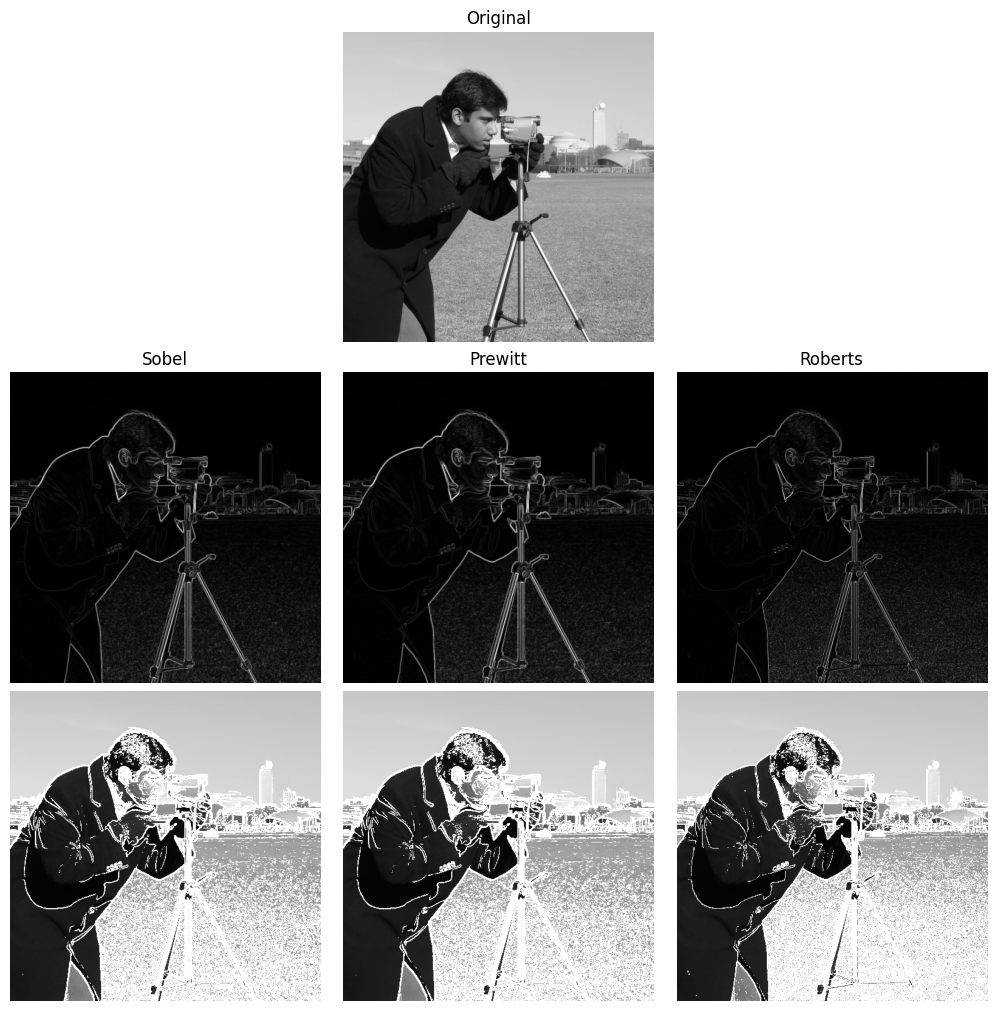

In [20]:
# solution
filtered_imgs = filter_imgs([camera], [filters.sobel, filters.prewitt, filters.roberts], [[[]]*3][0])
imgs_with_edges = [np.where(fi > 0.03, 255, camera) for fi in filtered_imgs[1:]]
titles = ['Original', 'Sobel', 'Prewitt', 'Roberts'] + ['']*3

order = [[0, [1,2]], [1, [0,1]], [1,[1,2]], [1,[2,3]], [2, [0,1]], [2,[1,2]], [2,[2,3]]]
cp.custom_grids(filtered_imgs + imgs_with_edges, 3, 3, titles, order, cmap='gray', axis='off').show()



*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

The edge detectors work different, however all of them are **based on the first derivative (finite differences).**

- **Roberts**: It considers a 2 by 2 mask, and works with the Cross gradient operator. The limitation of this detector is that it doesn't consider the horizontal or vertical neighbors, since the "1s" are in the corners of the mask.

- **Prewitt**: It considers a 3 by 3 mask and uniform weights, it works by giving  the same importance to all the pixels. It is focused on detecting horizontal and vertical edges.

- **Sobel**: It considers a 3 by 3 mask wit non-uniform weights, and is very similar to the Prewitt, the main difference it works by giving  more importance to the pixels that are closer to the center (closest neighbors). Sobel is able to both detect edges and smooth the image at the same time.

The main limitation of these edge detectors is precisely the calculation of the gradient itself and the discontinuity of the contours. If we have a low contrast image, or the source of light is in an specific point, the gradient will not be high enough for the mask to detect it. Also, if we have many objects that are one behind the other.

Individually, the Roberts operator is just 2x2, which makes it more susceptible to noise and less likely to pick up on weak edges. Sobel and Prewitt have the drawback of only being able to detect horizontal and vertical edges; they are unable to detect diagonal edges. They take longer to compute as well because they are larger than the Roberts operator.


### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

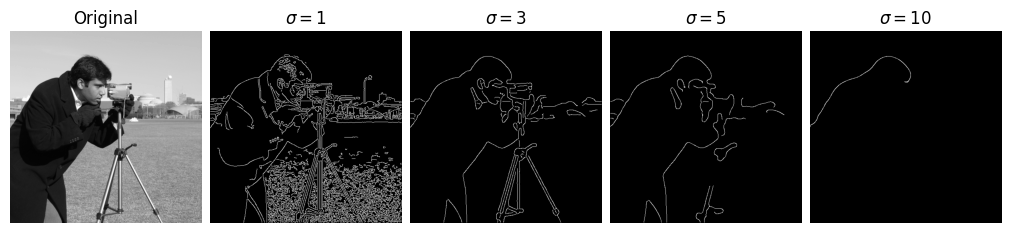

In [21]:
# solution
filtered_imgs = [feature.canny(camera, sigma) for sigma in [1, 3, 5, 10]]
canny_titles = ['Original'] + [f'$\sigma={sigma}$' for sigma in [1, 3, 5, 10]]

cp.custom_grids([camera] + filtered_imgs, 1, 5, canny_titles, cmap ='gray', axis='off').show()

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

- As seen in the images above, when we increased the sigma value (the treshold) the contours needed to have a high gradient in order to be preserved.

- For hysteresis thresholding, the **high threshold** help us to **start edge curves** and the **low threshold to continue them**.  All edges with intensities over the high threshold are regarded as strong edges, whereas all edges with intensities below the low threshold are not. A weak edge is one whose intensity is between the high and low thresholds; it will only be counted as an edge if it is related to another edge that is strong.


*   What is the algorithm behind the Canny operator?


**Solution**

In summary:

- First, we compute the derivative of the gaussian (reducing noise and filtering at the same time).
- Then we find the magnitude and orientation of gradient.
- Use non-maximum suppression.
- Finally we apply the hysteresis, by defining a low and high thresholds to start edge curves and continue them, respectively.


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Thursday, the 16th of October, 2022**
